# Es 06.1

Si richiede di completare il codice per la simulazione di un modello di Ising 1D aggiungendo due diversi metodi di campionamento:

- L'algoritmo di Metropolis
- L'algoritmo di Gibbs

Per tale modello si suppone una hamiltoniana del tipo:

$$H =-J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$

dove $\{ s_i \}_{i=1,N}$ sono variabili di spin con valori $\{-1;1\}$, $N$ è il numero di elementi nel sistema ($N=50$ nel nostro caso), $J>0$ (in quanto supponiamo un modello ferromagnetico) è l'interazione tra i due spin ($J=1$ nel nostro caso) e $h$ è il campo esterno applicato a tale sistema.

Una volta implementati tali metodi è stato necessario aggiungere dei modi di misura per registrare le grandezze che vogliamo prendere in esame, che sono:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Infine sono stati presi in esame i valori di queste grandezze per diverse temperature $T$. I valori considerati sono stati ottenuti ottenuti a seguito di blocking method, in particolare essi sono i valori dell'ultimo blocco per ogni $T$.

Si mostrano sotto i grafici ottenuti con Blocking method per i diversi metodi di campionamento in funzione di $T$ (in azzurro) confrontati con la funzione esatta ottenuta a seguito di calcoli analitici (in rosso).

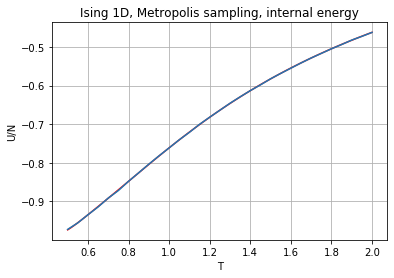

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data_file=np.loadtxt('Data_Metropolis.dat')

T=data_file [:,0]
U=data_file [:,1]
errU=data_file[:,2]
C=data_file[:,3]
errC=data_file[:,4]
X=data_file[:,5]
errX=data_file[:,6]

points=100
T2 = np.linspace(0.5,2.0,num=points)
beta = 1/T2
J = 1.0
Ns = 50
th = np.tanh(J/T2)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.errorbar(T,U,yerr=errU)
plt.grid(True)
plt.plot(T2, e,color="r")
plt.title('Ising 1D, Metropolis sampling, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

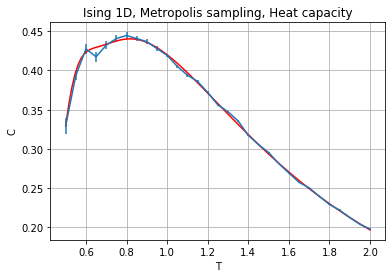

In [2]:
plt.errorbar(T,C,yerr=errC)
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T2, heat,color="r")
plt.title('Ising 1D, Metropolis sampling, Heat capacity')
plt.grid(True)
plt.xlabel('T')
plt.ylabel('C')
plt.show()

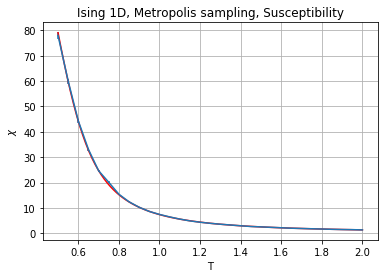

In [3]:
X2 = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.show()
plt.errorbar(T,X,yerr=errX)
plt.plot(T2, X2,color="r")
plt.title('Ising 1D, Metropolis sampling, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.show() 

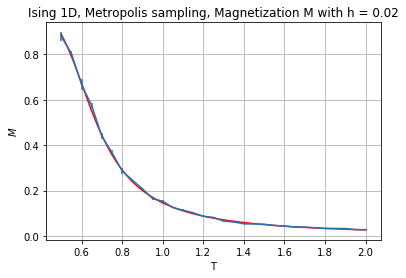

In [4]:
data_file=np.loadtxt('Data_Metropolis_Magnetization.dat')

T3=data_file [:,0]
M=data_file [:,1]
errM=data_file[:,2]

h=0.02 #external field
b = 1/T2

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M2 = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.errorbar(T3,M,yerr=errM)
plt.plot(T2, M2,color="r")
plt.grid(True)
plt.title('Ising 1D, Metropolis sampling, Magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

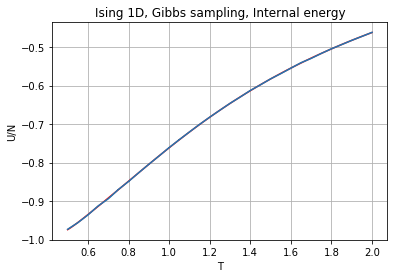

In [5]:
data_file3=np.loadtxt('Data_Gibbs.dat')
data_file4=np.loadtxt('Data_Gibbs_Magnetization.dat')

t=data_file3 [:,0]
u=data_file3 [:,1]
erru=data_file3[:,2]
c=data_file3[:,3]
errc=data_file3[:,4]
x=data_file3[:,5]
errx=data_file3[:,6]

t2=data_file4 [:,0]
m=data_file4 [:,1]
errm=data_file4[:,2]

plt.errorbar(t,u,yerr=erru)
plt.grid(True)
plt.plot(T2, e,color="r")
plt.title('Ising 1D, Gibbs sampling, Internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

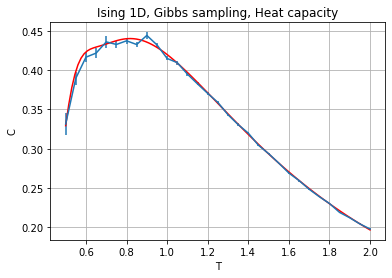

In [6]:
plt.errorbar(t,c,yerr=errc)
plt.plot(T2, heat,color="r")
plt.title('Ising 1D, Gibbs sampling, Heat capacity')
plt.grid(True)
plt.xlabel('T')
plt.ylabel('C')
plt.show()

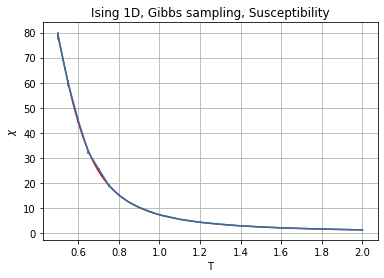

In [7]:
plt.show()
plt.errorbar(t,x,yerr=errx)
plt.plot(T2, X2,color="r")
plt.title('Ising 1D, Gibbs sampling, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.show() 

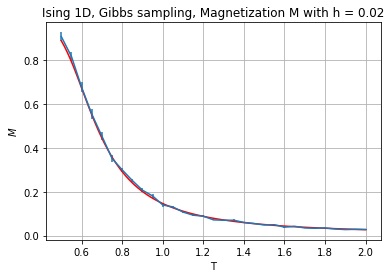

In [8]:
plt.errorbar(t2,m,yerr=errm)
plt.plot(T2, M2,color="r")
plt.grid(True)
plt.title('Ising 1D, Gibbs sampling, Magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()